In [1]:
import sqlite3
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

In [2]:
db_name='dinofunworld.db'
connection = sqlite3.connect(db_name)
conn_obj = connection.cursor()

In [15]:
# 1: The park's administrators would like you to help them understand the different paths visitors take through the park and different rides they visit. In this mission, they have selected 5 visitors at random whose checkin sequences they would like you to analyze. For now, they would like you to construct a distance matrix for these 5 visitors. The five visitors have the ids: 165316, 1835254, 296394, 404385, and 448990.

import sqlite3
import pandas as pd

db_name='dinofunworld.db'
connection = sqlite3.connect(db_name)

def func(pct):
  return "{:1.1f}%".format(pct)

userIds = [165316, 1835254, 296394, 404385, 448990]
sql = "SELECT visitorID, sequence FROM sequences where visitorID IN (165316, 1835254, 296394, 404385, 448990);"

sequences_df = pd.read_sql(sql, connection)

# Convert sequences to a list of lists
sequences_df['sequence_list'] = sequences_df['sequence'].apply(lambda s: s.split("-"))

# Compute distances between each pair of sequences
dist_dict = {}
for i in range(5):
    for j in range(i+1, 5):
        dist = sum(int(v1) != int(v2) for v1, v2 in zip(sequences_df['sequence_list'][i], sequences_df['sequence_list'][j]))
        id_i = sequences_df['visitorID'][i]
        id_j = sequences_df['visitorID'][j]

        # Update distances for visitorID i
        inner_dict_i = dist_dict.get(id_i, {})
        inner_dict_i[id_j] = dist
        dist_dict[id_i] = inner_dict_i

        # Update distances for visitorID j
        inner_dict_j = dist_dict.get(id_j, {})
        inner_dict_j[id_i] = dist
        dist_dict[id_j] = inner_dict_j

# Print dictionary of distances
print(dist_dict)


{165316: {296394: 318, 404385: 329, 448990: 318, 1835254: 336}, 296394: {165316: 318, 404385: 303, 448990: 0, 1835254: 282}, 404385: {165316: 329, 296394: 303, 448990: 303, 1835254: 298}, 448990: {165316: 318, 296394: 0, 404385: 303, 1835254: 282}, 1835254: {165316: 336, 296394: 282, 404385: 298, 448990: 282}}


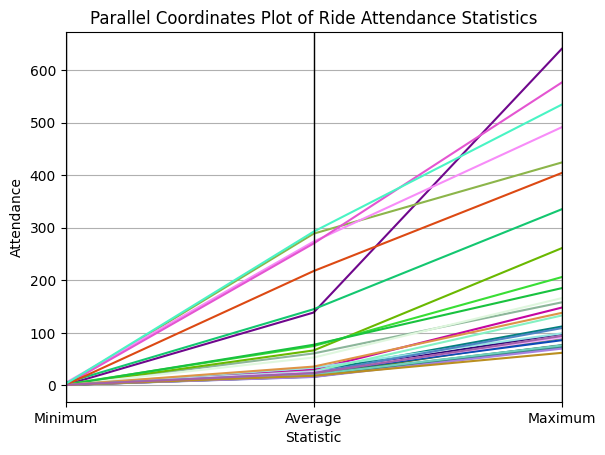

In [31]:
# 2: The park's administrators would like to understand the attendance dynamics at each ride (note that not all attractions are rides). They would like to see the minimum (non-zero) attendance at each ride, the average attendance over the whole day, and the maximum attendance for each ride on a Parallel Coordinate Plot.

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

db_name='dinofunworld.db'
connection = sqlite3.connect(db_name)

attraction_query = "SELECT AttractionID, Name FROM attraction WHERE LOWER(Category) LIKE '%ride%';"
attraction = pd.read_sql(attraction_query, connection)

# Load visitor sequence data from the database
sequences_query = "SELECT visitorID, sequence FROM sequences;"
sequences = pd.read_sql(sequences_query, connection)
sequences['sequence_list'] = sequences['sequence'].apply(lambda s: s.split("-"))

# Compute ride attendance statistics based on visitor sequences
ride_dict_seq = {}
ride_dict_name = {}
for index, row in attraction.iterrows():
    ride_dict_seq[row['AttractionID']] = Counter()
    ride_dict_name[row['AttractionID']] = row['Name']

for index, row in sequences.iterrows():
    sequences_list = row['sequence_list']
    for i, seq in enumerate(sequences_list):
        if int(seq) in ride_dict_seq:
            ride_dict_seq[int(seq)][i] += 1

# Create a DataFrame to store ride attendance statistics
rides_df = pd.DataFrame()
min_list = []
name_list = []
max_list = []
avg_list = []
for key, value in ride_dict_seq.items():
    min_list.append(min(ride_dict_seq[key].values()))
    max_list.append(max(ride_dict_seq[key].values()))
    avg_list.append((sum(ride_dict_seq[key].values()) / len(ride_dict_seq[key].values())))
    name_list.append(ride_dict_name[key])
rides_df['Ride_Name'] = name_list
rides_df['Minimum'] = min_list
rides_df['Average'] = avg_list
rides_df['Maximum'] = max_list

# Plot ride attendance statistics using parallel coordinates
pd.plotting.parallel_coordinates(rides_df, 'Ride_Name')
plt.gca().legend_.remove()
plt.title('Parallel Coordinates Plot of Ride Attendance Statistics')
plt.xlabel('Statistic')
plt.ylabel('Attendance')
plt.show()

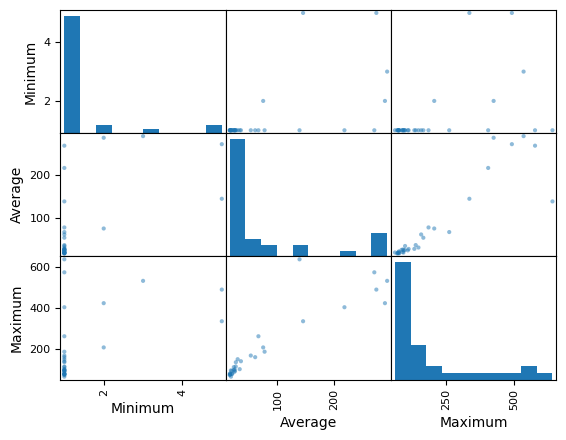

                    Ride_Name  Minimum     Average  Maximum
0      Wrightiraptor Mountain        1   60.889780      158
1          Galactosaurus Rage        1   66.577551      261
2          Auvilotops Express        1  138.728745      640
3                  TerrorSaur        2  288.690909      424
4           Wendisaurus Chase        5  273.585366      491
5        Keimosaurus Big Spin        2   74.935354      206
6                    Firefall        1  270.036145      576
7                   Atmosfear        5  144.986056      335
8                  North Line        1   53.196721      166
9             Jeredactyl Jump        1   26.783262      112
10            Sauroma Bumpers        1   30.146930      148
11       Flying TyrAndrienkos        1   24.585313       98
12       Cyndisaurus Asteroid        1   16.873303       72
13                 Beelzebufo        1   18.239726       93
14       Enchanted Toadstools        1   16.357616       77
15                Stegocycles        1  

In [32]:
# 3: In addition to a PCP, the administrators would like to see a Scatterplot Matrix depicting the min, average, and max attendance for each ride as above.

pd.plotting.scatter_matrix(rides_df)
plt.show()
print(rides_df)